# Лабораторная работа №4
## ОБРАБОТКА ВРЕМЕННЫХ РЯДОВНА ОСНОВЕ МНОГОМЕРНЫХ ДАННЫХ

Комлева Юлия Владимировна

Вариант: 9

Группа: РИМ-281226


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

%matplotlib inline

Требуется построить одномерный временной ряд, отражающий зависимость итоговой стоимости билетов (Ticketcost) от числа дней между датами вылета и заказа({FlightDate-SaleData} в днях).
Часто подобную  задачу  называют усредненным  прогнозом  цен  на авиабилеты от числа предварительных дней между их датами покупки и вылета.

In [2]:
df = pd.read_excel('airline_flights_data_ord.xlsx', header=1)
df.shape

(7818, 17)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,customer type,Year,order #,Sale Date,Flight date,Holiday Y/N,Sum $,Service1,Service2,Service3,# of legs,Столбец1,Ticket cost
0,NaN,NaN,NaN,NaN,private,2017.0,6762205.0,2017-01-17,2017-01-18,NaN,250.0,0,0,0,2.0,250.0,125.0
1,NaN,NaN,NaN,NaN,private,2017.0,6762216.0,2017-01-17,2017-01-18,NaN,0.0,0,0,0,16.0,0.0,0.0
2,NaN,NaN,NaN,NaN,private,2017.0,6773425.0,2017-01-25,2017-03-09,NaN,0.0,0,0,0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,private,2017.0,6774017.0,2017-01-25,2017-03-09,NaN,0.0,0,0,0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,private,2017.0,6774135.0,2017-01-25,2017-03-09,NaN,0.0,0,0,0,0.0,0.0,0.0


In [4]:
df=df.dropna(subset=['Ticket cost','Sale Date','Flight date'])
df.shape

(7806, 17)

In [5]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,customer type,Year,order #,Sale Date,Flight date,Holiday Y/N,Sum $,Service1,Service2,Service3,# of legs,Столбец1,Ticket cost
0,NaN,NaN,NaN,NaN,private,2017.0,6762205.0,2017-01-17,2017-01-18,NaN,250.0,0,0,0,2.0,250.0,125.0
1,NaN,NaN,NaN,NaN,private,2017.0,6762216.0,2017-01-17,2017-01-18,NaN,0.0,0,0,0,16.0,0.0,0.0
2,NaN,NaN,NaN,NaN,private,2017.0,6773425.0,2017-01-25,2017-03-09,NaN,0.0,0,0,0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,private,2017.0,6774017.0,2017-01-25,2017-03-09,NaN,0.0,0,0,0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,private,2017.0,6774135.0,2017-01-25,2017-03-09,NaN,0.0,0,0,0,0.0,0.0,0.0


In [6]:
df['diff_date'] = (pd.to_datetime(df['Flight date'])-pd.to_datetime(df['Sale Date']))
df['diff_date'] = df['diff_date'].apply(lambda x: x.days)

In [7]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,customer type,Year,order #,Sale Date,Flight date,Holiday Y/N,Sum $,Service1,Service2,Service3,# of legs,Столбец1,Ticket cost,diff_date
0,NaN,NaN,NaN,NaN,private,2017.0,6762205.0,2017-01-17,2017-01-18,NaN,250.0,0,0,0,2.0,250.0,125.0,1
1,NaN,NaN,NaN,NaN,private,2017.0,6762216.0,2017-01-17,2017-01-18,NaN,0.0,0,0,0,16.0,0.0,0.0,1
2,NaN,NaN,NaN,NaN,private,2017.0,6773425.0,2017-01-25,2017-03-09,NaN,0.0,0,0,0,0.0,0.0,0.0,43
3,NaN,NaN,NaN,NaN,private,2017.0,6774017.0,2017-01-25,2017-03-09,NaN,0.0,0,0,0,0.0,0.0,0.0,43
4,NaN,NaN,NaN,NaN,private,2017.0,6774135.0,2017-01-25,2017-03-09,NaN,0.0,0,0,0,0.0,0.0,0.0,43


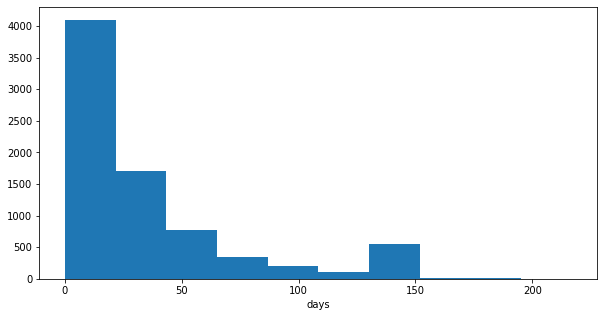

In [8]:
plt.figure(figsize = (10, 5))
plt.hist(df['diff_date'])
plt.xlabel('days')
plt.show()

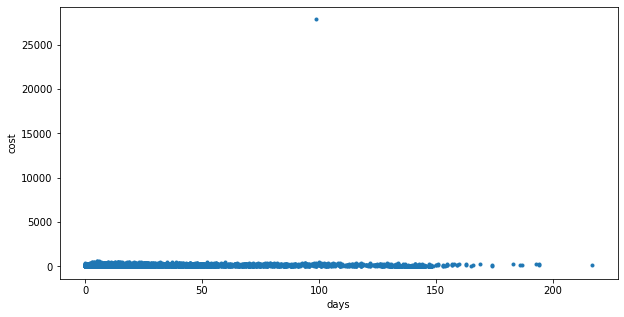

In [9]:
plt.figure(figsize = (10, 5))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.')
plt.xlabel('days')
plt.ylabel('cost')
plt.show()

Удалите следующие точки:
- все билеты, для которых столбец Sum равен 0 (отмененные заказы);
- все билеты, стоимость которых выше 1000\$ (слишком дорого);
- все билеты, стоимость которых ниже 30$ (подозрительно дешево);
- а еще точки с NaN и билеты, которые купили очень мало людей в определенный срок (например, когда число дней между датами вылета и заказа {FlightDate - SaleData} равно 111 и 124, где зафиксирована всего одна  непрезентативная  покупка), так как они тоже являются аномалиями для данной многомерной выборки.
- точки стоимости  билетов  со  сроками  покупки больше 148 дней,  так  как после этого срока точки покупок встречаются очень редко и их можно считать выбивающимися из общей зависимости (недостаточными для статистики).

In [10]:
df = df.loc[(df['Sum $']!=0) & (df['Ticket cost'] <= 1000) & (df['Ticket cost'] > 30) & (df['diff_date'] < 148)].sort_values('diff_date', ascending=False)
df = df[['diff_date','Ticket cost']]
df.shape

(6219, 2)

In [11]:
df.head()

,diff_date,Ticket cost
3822,147,85.25875
3813,147,85.25875
3845,147,85.25875
3843,147,41.90750
3803,147,85.25875


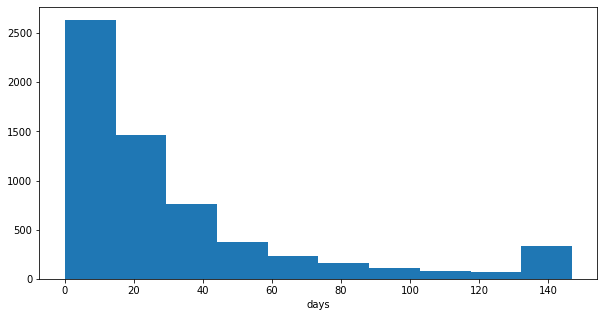

In [12]:
plt.figure(figsize = (10, 5))
plt.hist(df['diff_date'])
plt.xlabel('days')
plt.show()

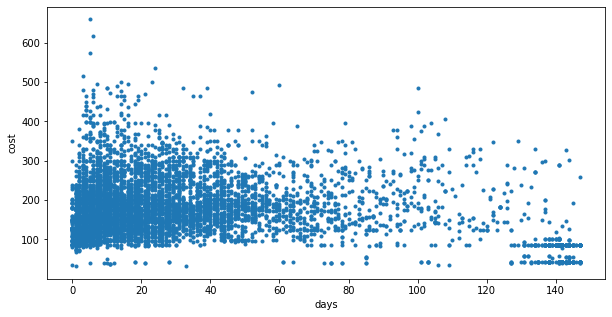

In [13]:
plt.figure(figsize = (10, 5))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.')
plt.xlabel('days')
plt.ylabel('cost')
plt.show()

In [14]:
df = df.loc[~df['diff_date'].isin([111,124])]

In [15]:
df.shape

(6213, 2)

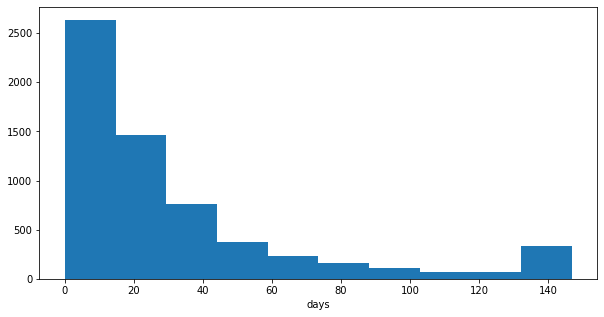

In [16]:
plt.figure(figsize = (10, 5))
plt.hist(df['diff_date'])
plt.xlabel('days')
plt.show()

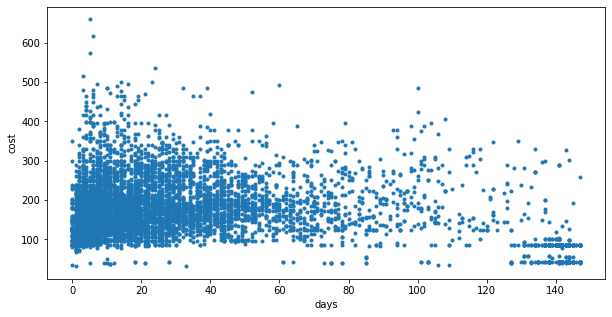

In [17]:
plt.figure(figsize = (10, 5))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.')
plt.xlabel('days')
plt.ylabel('cost')
plt.show()

In [23]:
def smooth(x, window = 10):
    res=[]
    for i in range(len(x) - window):
        res.append(np.mean(x[i:i + window]))
    return np.array(res)

def smooth(X, window_len = 10):
    X = np.array(X)
    half_window=window_len//2
    X=np.concatenate([[X[0]]*half_window, X, [X[-1]]*half_window])
    smoothed=[]
    
    for i in range(half_window,len(X)-half_window):
        smoothed.append(X[i-half_window:i+1+half_window].sum()/window_len)
    
    return np.array(smoothed)

Теперь попробуем построить из этого множества точек одномерный временной ряд стоимости билетов от числа предварительных дней до покупки. Первое, что можно сделать – это просто посчитать среднее значение  стоимости  билетов  для  каждого  дня,  то  есть  посчитать функцию mean() от  каждого  массива  стоимости билетов в  каждой временной точке.

In [38]:
day_cost_mean = df.groupby(by='diff_date')['Ticket cost'].mean()
smooth_day_cost_mean = smooth(day_cost_mean, window_len=13)
day_cost_median = df.groupby(by='diff_date')['Ticket cost'].median()
smooth_day_cost_median = smooth(day_cost_median, window_len=13)

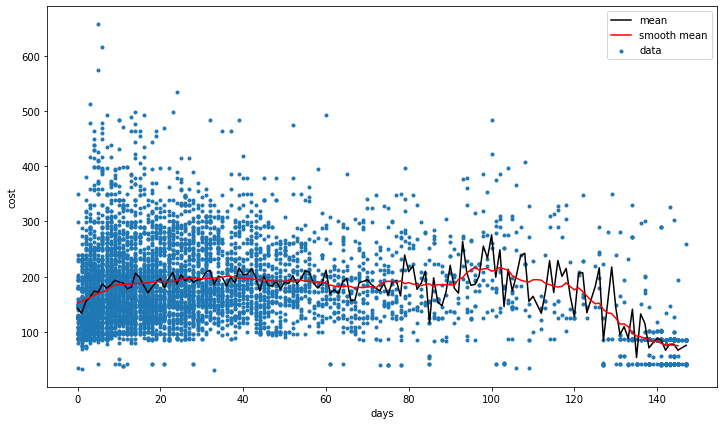

In [39]:
plt.figure(figsize = (12, 7))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.', label='data')
plt.plot(day_cost_mean, 'k', label='mean')
plt.plot(smooth_day_cost_mean, 'red' , label = 'smooth mean')
plt.xlabel('days')
plt.ylabel('cost')
plt.legend()
plt.show()

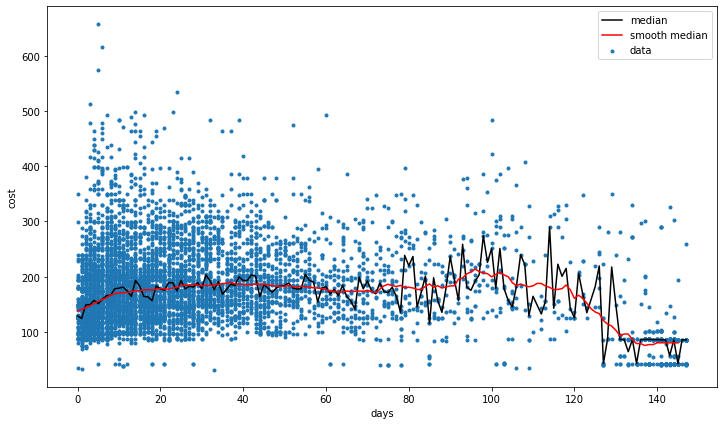

In [40]:
plt.figure(figsize = (12, 7))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.', label='data')
plt.plot(day_cost_median, 'k', label='median')
plt.plot(smooth_day_cost_median, 'red' , label = 'smooth median')
plt.xlabel('days')
plt.ylabel('cost')
plt.legend()
plt.show()

проблемы
- Во-первых, стоимость билетов  принимает  некоторые  явные  значения из множества, нежели «абстрактные» средние величины, поэтому более верным будет построить график расчета медианы median()от времени
- Во-вторых, функция среднего значения есть дискретная форма мат. ожидания  только  для  стационарных  и  эргодических случайных величин (здесь случайная величина = стоимость билетов).Ни то ни другое  условие  здесь  явно  не  выполняется,  а  значит  построенные кривые демонстрируют стоимость билетов от числа предварительных дней,  как  если  бы  стоимость  их  была  бы  равномерно  разбросана в каждом временном отсчете(это явно не так).
- В-третьих, нас интересует усредненный прогноз цен на авиабилеты от числа предварительных дней между их датами покупки и вылета, а у прогноза еще  есть  такое понятие, как доверительный интервал. То есть, кроме средних цен на билеты нас интересует в каком диапазоне цены разбросаны вообще, а этого простым вычислением среднего уже не  посчитать. Вообще-то,  есть  еще  дисперсияили СКВО,  но  см. проблему  No2  выше. Постройте подобные  оценочные  интервалы (среднее±1.65*std(), со сглаживанием)

In [44]:
high=[]
low=[]
std_day_cost_median = day_cost_median.std()
for i in range(day_cost_median.shape[0]):
    high.append(day_cost_median.values[i] + 1.65 * std_day_cost_median)
    low.append(day_cost_median.values[i] - 1.65 * std_day_cost_median)
smooth_high = smooth(high, 13)
smooth_low = smooth(low, 13)

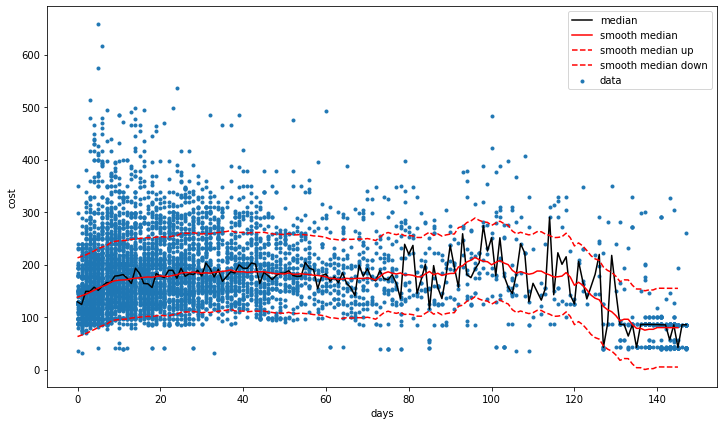

In [45]:
plt.figure(figsize = (12, 7))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.', label='data')
plt.plot(day_cost_median, 'k', label='median')
plt.plot(smooth_day_cost_median, 'red' , label = 'smooth median')
plt.plot(smooth_high, 'r--' , label = 'smooth median up')
plt.plot(smooth_low, 'r--' , label = 'smooth median down')
plt.xlabel('days')
plt.ylabel('cost')
plt.legend()
plt.show()

Для  решения  всех указанных проблемиспользуется  более  научная методика. Пусть каждый набор точек (стоимости билетов)в каждом временном отсчете (число дней)есть выборка некоторой случайной величины. Если  это  случайная  величина –унее  есть  функция распределения (плотность), благодаря которой можно оценитьеемат. ожидание=    50%-перцентиль(средняя  стоимостьбилета)и доверительные  интервалы  = 5%-перцентильи95%-перцентиль(разброс стоимости билетов подням).Значит, самое главное–построитьплотность функции распределения для  этой  неизвестной  случайной  величины  стоимости  билета.

In [46]:
distribution = st.norm

Для  начала  попробуйтесопоставить  гистограмму стоимости билетов,  например, для  разности  дат  =  7  дней,  с  плотностью нормального распределения с найденными параметрами:

In [47]:
week = df.loc[df['diff_date'] == 7]['Ticket cost'].copy()

In [48]:
params = distribution.fit(week)
params # мат.  ожидание  и сигма  (корень  из дисперсии)

(179.05774916247904, 71.02606865640536)

In [49]:
y,x = np.histogram(week, bins=100)
pdf_fitted = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])

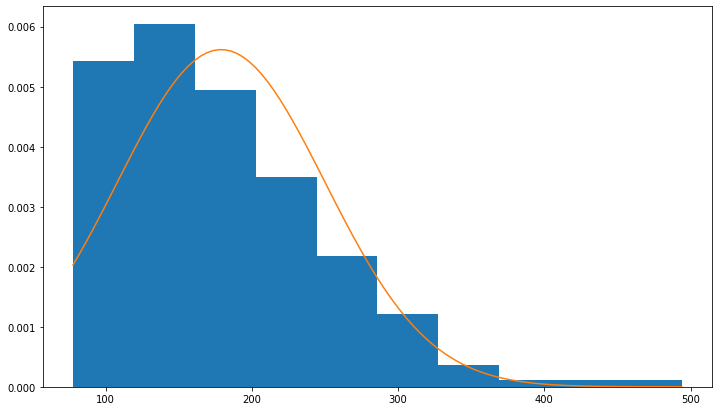

In [50]:
plt.figure(figsize = (12, 7))
plt.hist(week,density=True)
plt.plot(x, pdf_fitted)
plt.show()

Аналогичным образом найдите функции плотности нормального распределения для всех временных точек (дней), но без построения гистограмм/кривых. Возможно,  не  все  точки  в  принципе  возможно подогнать  под  нормальное  распределение,  и  тогда Python будет выдавать предупреждения(warning),  но  пока  что  их  можно игнорировать.

In [51]:
distributions = pd.DataFrame(index=df['diff_date'].drop_duplicates())

In [52]:
distributions['norm_params'] = None
for i in distributions.index:
    distribution = st.norm
    params = distribution.fit(df.loc[df['diff_date'] == i]['Ticket cost'])
    distributions.at[i, 'norm_params'] = params
    #5%-перцентиль (нижний доверительный интервал)
    distributions.at[i, 'norm_05_prcntl']=distribution.ppf(0.05,*params[:-2], loc=params[-2], scale=params[-1])
    #50%-перцентиль (средний прогноз)
    distributions.at[i, 'norm_50_prcntl']=distribution.ppf(0.5,*params[:-2], loc=params[-2], scale=params[-1])
    #95%-перцентиль (верхний доверительный интервал)
    distributions.at[i, 'norm_95_prcntl']=distribution.ppf(0.95,*params[:-2], loc=params[-2], scale=params[-1])

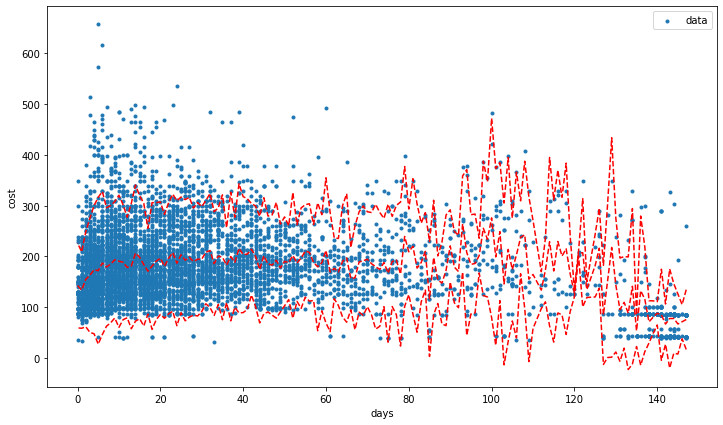

In [54]:
plt.figure(figsize = (12, 7))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.', label='data')

plt.plot(distributions['norm_05_prcntl'], 'r--' )
plt.plot(distributions['norm_50_prcntl'], 'r--' )
plt.plot(distributions['norm_95_prcntl'], 'r--' )
plt.xlabel('days')
plt.ylabel('cost')
plt.legend()
plt.show()

In [55]:
smooth_norm05 = smooth(distributions['norm_05_prcntl'], 13)
smooth_norm50 = smooth(distributions['norm_50_prcntl'], 13)
smooth_norm95 = smooth(distributions['norm_95_prcntl'], 13)

In [56]:
smooth_norm05.shape

(146,)

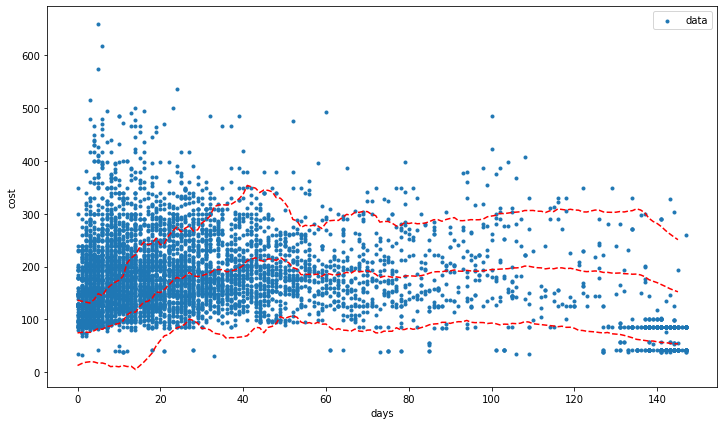

In [57]:
plt.figure(figsize = (12, 7))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.', label='data')

plt.plot(smooth_norm05, 'r--' )
plt.plot(smooth_norm50, 'r--' )
plt.plot(smooth_norm95, 'r--' )
plt.xlabel('days')
plt.ylabel('cost')
plt.legend()
plt.show()

# Непараметрические

In [91]:
#kde = st.gaussian_kde(df[['diff_date','Ticket cost']])

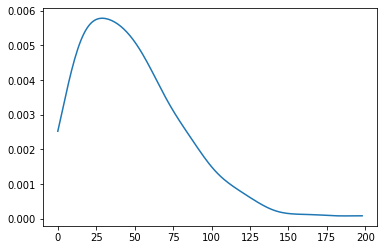

In [92]:
kde = st.gaussian_kde(week, bw_method='scott') # строим оценку
plt.plot(kde.pdf(np.linspace(week.min(),week.max(), week.size)));# функция распределения в границах случайной величины

In [59]:
def kde_perc(ikde, low, high, n, perc):
    for i in np.linspace(low, high, n)[1:]: # от нижней до верхней границы
        F = ikde.integrate_box_1d(low,i) # интеграл плотности
        if F > perc: # чуть выше границы суммы
            return i # есть искомое значение

In [60]:
print(kde_perc(kde,week.min(),week.max(),week.size,0.05),'05%-перцентиль')
print(kde_perc(kde,week.min(),week.max(),week.size,0.5),'50%-перцентиль')
print(kde_perc(kde,week.min(),week.max(),week.size,0.95),'95%-перцентиль')

94.56818181818181 05%-перцентиль
176.5568181818182 50%-перцентиль
477.18181818181813 95%-перцентиль


In [87]:
distributions.index

Int64Index([147, 146, 145, 144, 143, 142, 141, 140, 139, 138,
            ...
              9,   8,   7,   6,   5,   4,   3,   2,   1,   0],
           dtype='int64', name='diff_date', length=146)

In [61]:
for i in distributions.index:
    try:
        kde_data=df.loc[df['diff_date']==i]['Ticket cost']
        kde = st.gaussian_kde(kde_data) # строим оценку
        distributions.at[i, 'gaussian_norm_05_prcntl']= kde_perc(kde, kde_data.min(), kde_data.max(), kde_data.size, 0.05)
        distributions.at[i, 'gaussian_norm_50_prcntl']= kde_perc(kde, kde_data.min(), kde_data.max(), kde_data.size, 0.5)
        distributions.at[i, 'gaussian_norm_95_prcntl']= kde_perc(kde, kde_data.min(), kde_data.max(), kde_data.size, 0.95)
    except Exception as e :
        print(i, str(e))

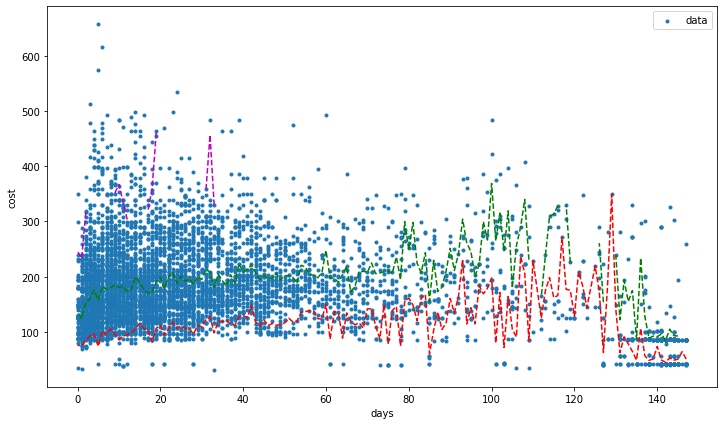

In [96]:
plt.figure(figsize = (12, 7))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.', label='data')

plt.plot(distributions['gaussian_norm_05_prcntl'], 'r--' )
plt.plot(distributions['gaussian_norm_50_prcntl'], 'g--' )
plt.plot(distributions['gaussian_norm_95_prcntl'], 'm--' )
plt.xlabel('days')
plt.ylabel('cost')
plt.legend()
plt.show()

In [64]:
smooth_kde05 = smooth(distributions['gaussian_norm_05_prcntl'], 13)
smooth_kde50 = smooth(distributions['gaussian_norm_50_prcntl'], 13)
smooth_kde95 = smooth(distributions['gaussian_norm_95_prcntl'], 13)

In [95]:
smooth_kde95

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

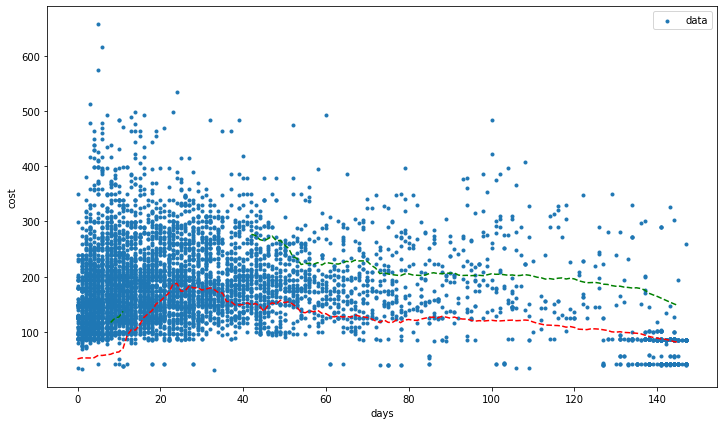

In [93]:
plt.figure(figsize = (12, 7))
plt.scatter(df['diff_date'], df['Ticket cost'], marker='.', label='data')

plt.plot(smooth_kde05, 'r--' )
plt.plot(smooth_kde50, 'g--' )
plt.plot(smooth_kde95, 'm--' )
plt.xlabel('days')
plt.ylabel('cost')
plt.legend()
plt.show()